In [1]:
# Reading in the modeled data 
from netCDF4 import Dataset

# Path to NetCDF file
sim_INDCOAL_05_RESICOAL33_WOOD56_OIL25_09_11 = "Q:/My Drive/Collaborations/Coal Fly Ash/data/CAM6-MIMI_2010CLIMO_INDCOAL0.05-RESICOAL33-WOOD56-OIL25_2009-2011MEAN.nc"

# Open the NetCDF file
model_data_x = Dataset(sim_INDCOAL_05_RESICOAL33_WOOD56_OIL25_09_11, mode='r')

# To verify the file is read correctly, you can print its contents or metadata
# print(model_data_x)

all_lon_options = model_data_x.variables['lon'][:]
all_lat_options = model_data_x.variables['lat'][:]
all_lev_options = model_data_x.variables['lev'][:]
all_time_options = model_data_x.variables['time'][:]

# Print the head (first 10 elements) of each array
print("Longitude options (head):", all_lon_options[:10])
print("Latitude options (head):", all_lat_options[:10])
print("Level options (head):", all_lev_options[:10])
print("Time options (head):", all_time_options[:10])

# Calculate d.lat, d.long, and d.time
d_lat = 180.0 / len(all_lat_options)
d_lon = 360.0 / len(all_lon_options)
d_time = 365.0 / len(all_time_options)

print("d.lat:", d_lat)
print("d.lon:", d_lon)
print("d.time:", d_time)

# Close the NetCDF file after you're done to free resources
model_data_x.close()


Longitude options (head): [ 0.    1.25  2.5   3.75  5.    6.25  7.5   8.75 10.   11.25]
Latitude options (head): [-90.         -89.05759162 -88.11518325 -87.17277487 -86.23036649
 -85.28795812 -84.34554974 -83.40314136 -82.46073298 -81.51832461]
Level options (head): [ 1.86788     2.35259056  2.94832105  3.6765011   4.56168619  5.63180097
  6.91832136  8.45639175 10.28492069 12.46014982]
Time options (head): [1639.67274385]
d.lat: 0.9375
d.lon: 1.25
d.time: 365.0


In [2]:
# Reading in the Observational data
import pandas as pd
import numpy as np

# Read in observational data (excel file) with specified parameters
data_file = "Q:\\My Drive\\Collaborations\\Coal Fly Ash\\data\\FeObs_Hamilton2022.xlsx"

# Define NaN values
na_values = ["-99", "-9999", "-99.0", "-0.99"]

# Read the Excel file
obs_data = pd.read_excel(data_file, sheet_name="FeObs_Hamilton2021", header=0, na_values=na_values)

# Function to convert any longitude encoded as deg W to 360 E
def convert_longitude(longitude):
    if longitude < 0.0:
        return 360.0 + longitude
    else:
        return longitude

# Convert Longitude column
obs_data["Longitude"] = obs_data["Longitude"].apply(convert_longitude)

# Or, display the dataframe using display from IPython.display
import panel as pn

# Create a Panel widget for the DataFrame
df_widget = pn.widgets.DataFrame(obs_data)
pn.extension()
# Display the Panel widget
df_widget

DataFrame(value=      Latitude  Longitude ...)

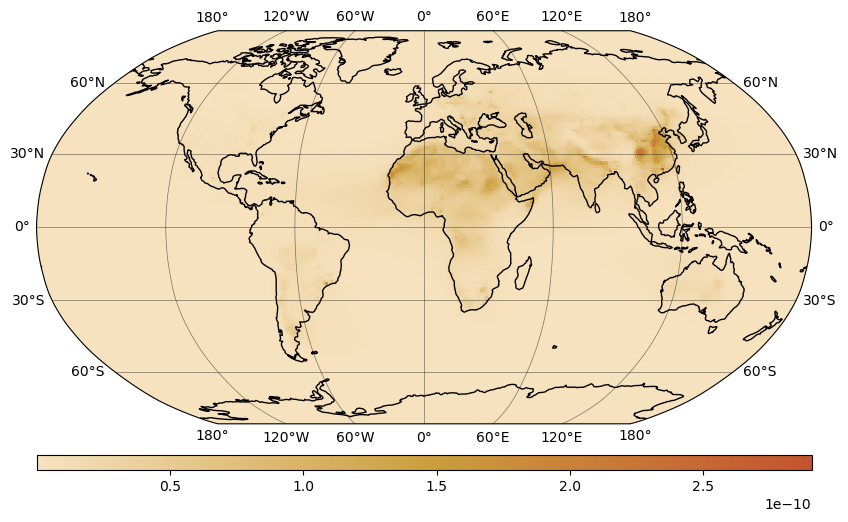

Longitude head: [0.   1.25 2.5  3.75 5.  ]
Latitude head: [-90.         -89.05759162 -88.11518325 -87.17277487 -86.23036649]


In [4]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import cartopy.crs as ccrs
import cartopy.feature as cfeature
from netCDF4 import Dataset
from matplotlib.colors import LinearSegmentedColormap

# Path to NetCDF file
sim_INDCOAL_05_RESICOAL33_WOOD56_OIL25_09_11 = "Q:/My Drive/Collaborations/Coal Fly Ash/data/CAM6-MIMI_2010CLIMO_INDCOAL0.05-RESICOAL33-WOOD56-OIL25_2009-2011MEAN.nc"

# Open the NetCDF file
model_data_x = Dataset(sim_INDCOAL_05_RESICOAL33_WOOD56_OIL25_09_11)

# Extract the required variables
all_long_options = model_data_x.variables['lon'][:]
all_lat_options = model_data_x.variables['lat'][:]
variable_sol = model_data_x.variables['FESOLSRF'][:]

# Create a figure and axis
fig = plt.figure(figsize=(10, 8), edgecolor='w')
ax = fig.add_subplot(1, 1, 1, projection=ccrs.Robinson())

# Set the central latitude and longitude
ax.set_global()

# Set face color and add features
ax.set_facecolor('white')
# ax.add_feature(cfeature.LAND, facecolor='black', zorder=2)
ax.coastlines(resolution='110m', color='black')
ax.gridlines(draw_labels=True, linewidth=0.5, color='black', alpha=0.5)

# Plot the variable_sol data
# Assuming variable_sol is a 2D array with dimensions corresponding to latitude and longitude
lon, lat = np.meshgrid(all_long_options, all_lat_options)

# Define your custom color map
color1 = '#f7e2bf'
color2 = '#cc9f3e'
color3 = '#c4532f'
positions = [0.0, 0.5, 1.0]
colors = [color1, color2, color3]
custom_cmap = LinearSegmentedColormap.from_list('custom_cmap', list(zip(positions, colors)))

# Plot the data
c = ax.pcolormesh(lon, lat, variable_sol[0, :, :], cmap=custom_cmap, transform=ccrs.PlateCarree())

# Add a colorbar
plt.colorbar(c, ax=ax, orientation='horizontal', pad=0.05, aspect=50)

# Display the map
plt.show()

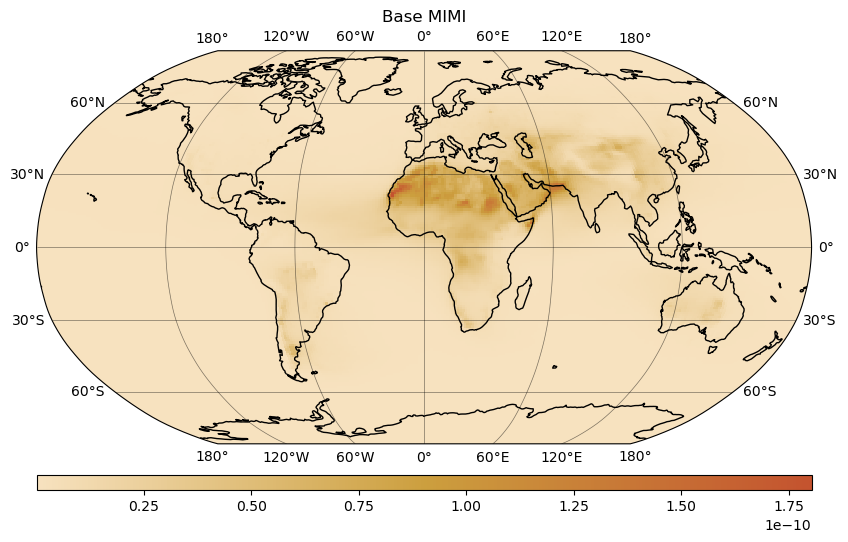

In [21]:
# Reading in other simulations 

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import cartopy.crs as ccrs
import cartopy.feature as cfeature
from netCDF4 import Dataset
from matplotlib.colors import LinearSegmentedColormap

# Paths to NetCDF file 
sim_INDCOAL_02_RESICOAL02_WOOD10_OIL38_09_11 = "Q:\My Drive\Collaborations\Coal Fly Ash\data\CAM6-MIMI_2010CLIMO_INDCOAL0.2-RESICOAL0.2-WOOD10-OIL38_2009-2011MEAN.nc"

# Open the NetCDF file
model_data_MIMI = Dataset(sim_INDCOAL_02_RESICOAL02_WOOD10_OIL38_09_11)

# Extract the required variables
all_long_options = model_data_MIMI.variables['lon'][:]
all_lat_options = model_data_MIMI.variables['lat'][:]
variable_sol_MIMI = model_data_MIMI.variables['FESOLSRF'][:]

# Create a figure and axis
fig = plt.figure(figsize=(10, 8), edgecolor='w')
ax = fig.add_subplot(1, 1, 1, projection=ccrs.Robinson())

# Set the central latitude and longitude
ax.set_global()

# Set face color and add features
ax.set_facecolor('white')
# ax.add_feature(cfeature.LAND, facecolor='black', zorder=2)
ax.coastlines(resolution='110m', color='black')
ax.gridlines(draw_labels=True, linewidth=0.5, color='black', alpha=0.5)

# Plot the variable_sol data
# Assuming variable_sol is a 2D array with dimensions corresponding to latitude and longitude
lon, lat = np.meshgrid(all_long_options, all_lat_options)

# Define your custom color map
color1 = '#f7e2bf'
color2 = '#cc9f3e'
color3 = '#c4532f'
positions = [0.0, 0.5, 1.0]
colors = [color1, color2, color3]
custom_cmap = LinearSegmentedColormap.from_list('custom_cmap', list(zip(positions, colors)))

ax.set_title('Base MIMI')
# Plot the data
c_MIMI = ax.pcolormesh(lon, lat, variable_sol_MIMI[0, :, :], cmap=custom_cmap, transform=ccrs.PlateCarree())
plt.colorbar(c_MIMI, ax=ax, orientation='horizontal', pad=0.05, aspect=50)
plt.show()


In [25]:
#SIMULATION 2 -RESICOAL
%matplotlib notebook
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import cartopy.crs as ccrs
import cartopy.feature as cfeature
from netCDF4 import Dataset
from matplotlib.colors import LinearSegmentedColormap

# Paths to NetCDF file 
sim_INDCOAL_02_RESICOAL33_WOOD10_OIL38_09_11 = "Q:\My Drive\Collaborations\Coal Fly Ash\data\CAM6-MIMI_2010CLIMO_INDCOAL0.2-RESICOAL33-WOOD10-OIL38_2009-2011MEAN.nc"

# Open the NetCDF file
sim1_RESICOAL = Dataset(sim_INDCOAL_02_RESICOAL33_WOOD10_OIL38_09_11)

# Extract the required variables
all_long_options = sim1_RESICOAL.variables['lon'][:]
all_lat_options = sim1_RESICOAL.variables['lat'][:]
variable_sol_sim1_RESICOAL = sim1_RESICOAL.variables['FESOLSRF'][:]

# Create a figure and axis
fig = plt.figure(figsize=(10, 8), edgecolor='w')
ax = fig.add_subplot(1, 1, 1, projection=ccrs.Robinson())

# Set the central latitude and longitude
ax.set_global()

# Set face color and add features
ax.set_facecolor('white')
# ax.add_feature(cfeature.LAND, facecolor='black', zorder=2)
ax.coastlines(resolution='110m', color='black')
ax.gridlines(draw_labels=True, linewidth=0.5, color='black', alpha=0.5)

# Plot the variable_sol data
# Assuming variable_sol is a 2D array with dimensions corresponding to latitude and longitude
lon, lat = np.meshgrid(all_long_options, all_lat_options)

# Define your custom color map
color1 = '#f7e2bf'
color2 = '#cc9f3e'
color3 = '#c4532f'
positions = [0.0, 0.5, 1.0]
colors = [color1, color2, color3]
custom_cmap = LinearSegmentedColormap.from_list('custom_cmap', list(zip(positions, colors)))

ax.set_title('Changes to Residential Coal')

c_sim1_RESICOAL = ax.pcolormesh(lon, lat, variable_sol_sim1_RESICOAL[0, :, :], cmap=custom_cmap, transform=ccrs.PlateCarree())
plt.colorbar(c_sim1_RESICOAL, ax=ax, orientation='horizontal', pad=0.05, aspect=50)
plt.show()

<IPython.core.display.Javascript object>

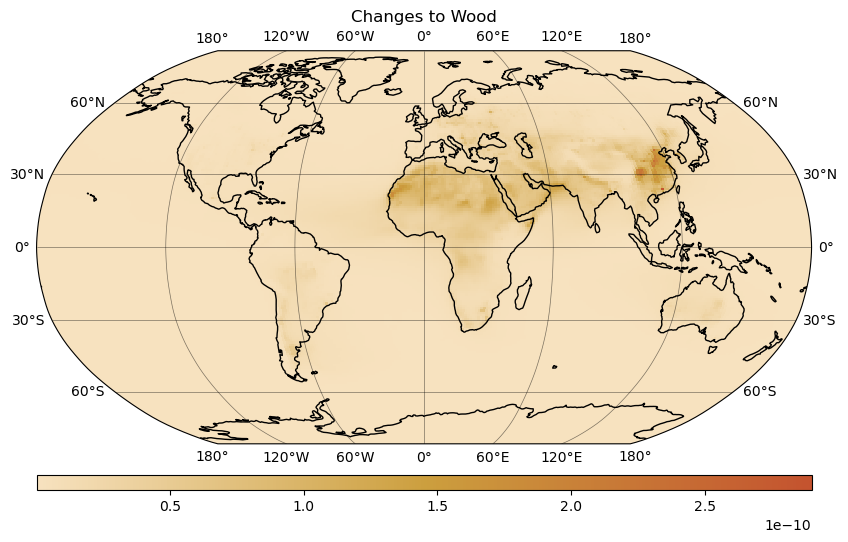

In [24]:
#SIMULATION 3 - WOOD
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import cartopy.crs as ccrs
import cartopy.feature as cfeature
from netCDF4 import Dataset
from matplotlib.colors import LinearSegmentedColormap

# Paths to NetCDF file 
sim_INDCOAL_02_RESICOAL33_WOOD56_OIL38_09_11 = "Q:\My Drive\Collaborations\Coal Fly Ash\data\CAM6-MIMI_2010CLIMO_INDCOAL0.2-RESICOAL33-WOOD56-OIL38_2009-2011MEAN.nc"
sim2_WOOD = Dataset(sim_INDCOAL_02_RESICOAL33_WOOD56_OIL38_09_11)

# Extract the required variables
all_long_options = sim2_WOOD.variables['lon'][:]
all_lat_options = sim2_WOOD.variables['lat'][:]
variable_sol_sim2_WOOD = sim2_WOOD.variables['FESOLSRF'][:]

# Create a figure and axis
fig = plt.figure(figsize=(10, 8), edgecolor='w')
ax = fig.add_subplot(1, 1, 1, projection=ccrs.Robinson())

# Set the central latitude and longitude
ax.set_global()

# Set face color and add features
ax.set_facecolor('white')
# ax.add_feature(cfeature.LAND, facecolor='black', zorder=2)
ax.coastlines(resolution='110m', color='black')
ax.gridlines(draw_labels=True, linewidth=0.5, color='black', alpha=0.5)

# Plot the variable_sol data
# Assuming variable_sol is a 2D array with dimensions corresponding to latitude and longitude
lon, lat = np.meshgrid(all_long_options, all_lat_options)

# Define your custom color map
color1 = '#f7e2bf'
color2 = '#cc9f3e'
color3 = '#c4532f'
positions = [0.0, 0.5, 1.0]
colors = [color1, color2, color3]
custom_cmap = LinearSegmentedColormap.from_list('custom_cmap', list(zip(positions, colors)))

ax.set_title('Changes to Wood')

# Plot the data
c_variable_sol_sim2_WOOD = ax.pcolormesh(lon, lat, variable_sol_sim2_WOOD[0, :, :], cmap=custom_cmap, transform=ccrs.PlateCarree())
plt.colorbar(c_variable_sol_sim2_WOOD, ax=ax, orientation='horizontal', pad=0.05, aspect=50)
plt.show()

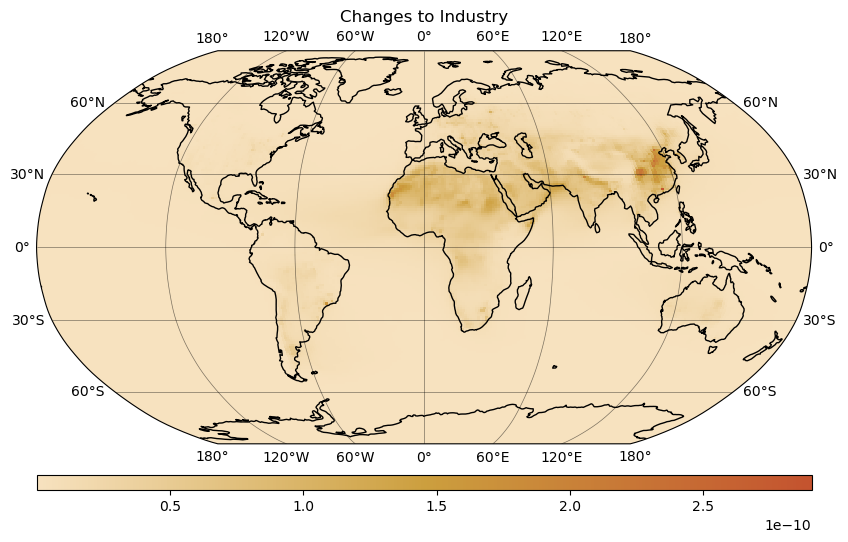

In [23]:
#SIMULATION 3 - INDUSTRY
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import cartopy.crs as ccrs
import cartopy.feature as cfeature
from netCDF4 import Dataset
from matplotlib.colors import LinearSegmentedColormap

# Paths to NetCDF file 
sim_INDCOAL_05_RESICOAL33_WOOD56_OIL25_09_11 = "Q:\My Drive\Collaborations\Coal Fly Ash\data\CAM6-MIMI_2010CLIMO_INDCOAL0.05-RESICOAL33-WOOD56-OIL25_2009-2011MEAN.nc"

# Open the NetCDF file
sim3_INDCOAL = Dataset(sim_INDCOAL_05_RESICOAL33_WOOD56_OIL25_09_11)

# Extract the required variables
all_long_options = sim3_INDCOAL.variables['lon'][:]
all_lat_options = sim3_INDCOAL.variables['lat'][:]
variable_sol_sim3_INDCOAL = sim3_INDCOAL.variables['FESOLSRF'][:]

# Create a figure and axis
fig = plt.figure(figsize=(10, 8), edgecolor='w')
ax = fig.add_subplot(1, 1, 1, projection=ccrs.Robinson())

# Set the central latitude and longitude
ax.set_global()

# Set face color and add features
ax.set_facecolor('white')
# ax.add_feature(cfeature.LAND, facecolor='black', zorder=2)
ax.coastlines(resolution='110m', color='black')
ax.gridlines(draw_labels=True, linewidth=0.5, color='black', alpha=0.5)

# Plot the variable_sol data
# Assuming variable_sol is a 2D array with dimensions corresponding to latitude and longitude
lon, lat = np.meshgrid(all_long_options, all_lat_options)

# Define your custom color map
color1 = '#f7e2bf'
color2 = '#cc9f3e'
color3 = '#c4532f'
positions = [0.0, 0.5, 1.0]
colors = [color1, color2, color3]
custom_cmap = LinearSegmentedColormap.from_list('custom_cmap', list(zip(positions, colors)))

ax.set_title('Changes to Industry')

# Plot the data
c_variable_sol_sim3_INDCOAL = ax.pcolormesh(lon, lat, variable_sol_sim3_INDCOAL[0, :, :], cmap=custom_cmap, transform=ccrs.PlateCarree())
plt.colorbar(c_variable_sol_sim3_INDCOAL, ax=ax, orientation='horizontal', pad=0.05, aspect=50)
plt.show()
